## Filter Method


本节代码包括：
-  常量特征 Constant Features
-  准常量特征 Quasi-Constant Features
-  彼此相关的特征

本节使用的数据集是 Kaggle Santander 的数据。该文件已经上传至 /data 目录。

如需自己下载，下载地址[Kaggle website](https://www.kaggle.com/c/santander-customer-satisfaction/data)。 注意请下载 train.csv，并更名为 st.csv 放置在 /data 目录下。

###  数据准备

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

In [3]:
# 读取数据
data = pd.read_csv('../data/santander.csv', nrows=50000)
data.shape

(50000, 371)

In [5]:
# First seperate dataset into training/testing 

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

###  常量特征 Constant Features

In [6]:
# 前提是特征都已经是数值化；用标准差检查
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

len(constant_features)

58

In [7]:
# 丢弃特征
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 312), (15000, 312))

In [8]:
# 如果特征是类别型，用 unique 方法找到常量特征
constant_features = [
    feat for feat in X_train.columns if len(X_train[feat].unique()) == 1
]

len(constant_features)

0

### 准常量特征 Quasi-Constant Features

In [9]:
quasi_constant_feat = []
for feature in X_train.columns:

    # 找到占比最大的值
    predominant = (X_train[feature].value_counts() / np.float(
        len(X_train))).sort_values(ascending=False).values[0]

    # 设定超过阈值的特征为 quasi-constant
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

119

In [10]:
# 观察具体的分布
quasi_constant_feat[0:10]

['imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_sal_var16_ult1',
 'ind_var6_0',
 'ind_var6',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var29_0']

In [11]:
# 0 占了 99.9% 的样本
X_train['imp_op_var40_efect_ult1'].value_counts() / np.float(len(X_train))

0.00       0.999400
900.00     0.000086
60.00      0.000057
1800.00    0.000057
600.00     0.000057
930.00     0.000029
420.00     0.000029
74.28      0.000029
270.00     0.000029
1200.00    0.000029
6600.00    0.000029
870.00     0.000029
750.00     0.000029
300.00     0.000029
120.00     0.000029
210.00     0.000029
150.00     0.000029
Name: imp_op_var40_efect_ult1, dtype: float64

### 彼此相关的特征

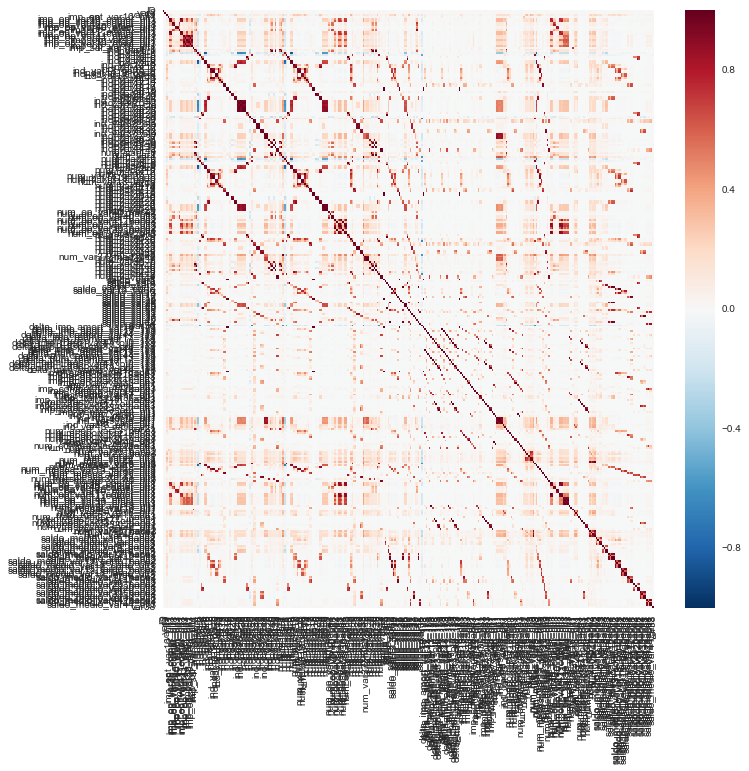

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 输出 Correlation Plot
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [14]:
# 输出所有相关的特征对
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,delta_num_compra_var44_1y3,delta_imp_compra_var44_1y3,1.0
1,delta_imp_compra_var44_1y3,delta_num_compra_var44_1y3,1.0
2,delta_num_aport_var13_1y3,delta_imp_aport_var13_1y3,1.0
3,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,1.0
4,num_trasp_var17_out_ult1,imp_trasp_var17_out_ult1,1.0
